In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    shuffle=True,
    random_state=42
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans=KMeans(init='random',n_clusters=3,random_state=42, max_iter=300,n_init=10)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [ ]:
kmeans.n_iter_

10

In [ ]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [ ]:
kmeans.labels_

array([0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1,
       0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2,
       1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1,
       0, 0], dtype=int32)

ELBOW METHOD

In [ ]:
kmeans_kwargs={"init":"random","n_init":10,"max_iter":300,"random_state":42,}

In [ ]:
sse=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

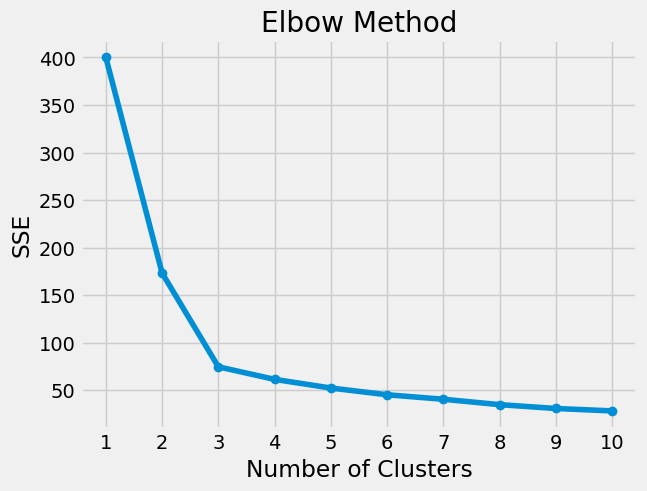

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse, marker='o')
plt.xticks(range(1,11))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Silhouette Method

In [ ]:
silhouette_cofficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_features)
  score=silhouette_score(scaled_features,kmeans.labels_)
  silhouette_cofficients.append(score)

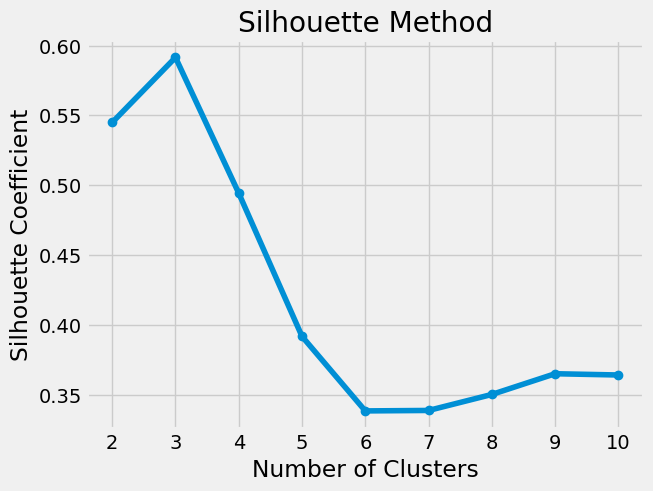

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_cofficients, marker='o')
plt.xticks(range(2,11))
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
data = pd.read_csv('/content/data.csv', index_col=0)
labels_true = pd.read_csv('/content/labels.csv', index_col=0)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=5, random_state=42)
predicted_labels = kmeans.fit_predict(pca_data)

score = silhouette_score(pca_data, predicted_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4038


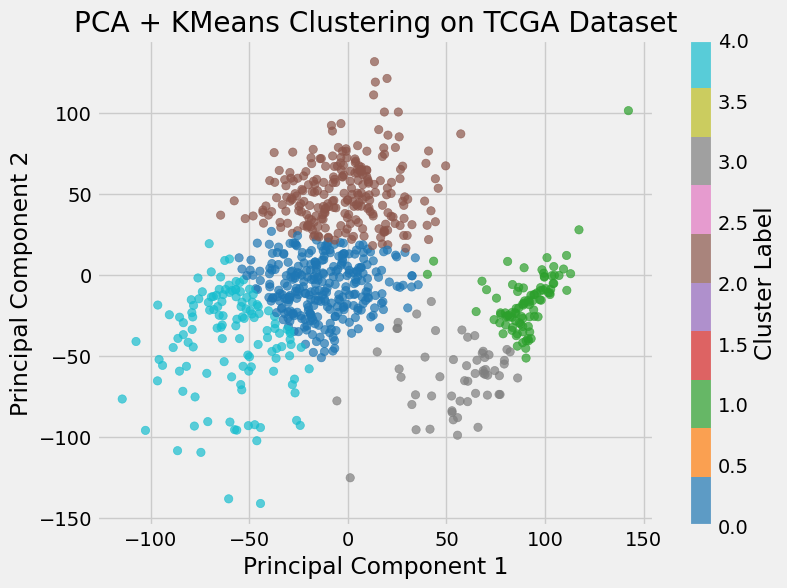

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted_labels, cmap='tab10', alpha=0.7)
plt.title("PCA + KMeans Clustering on TCGA Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

TITANIC DATASET

Only Train Dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(url)

In [ ]:
features = df[['Age', 'Fare', 'Pclass', 'Sex']].copy()

In [ ]:
features['Age'].fillna(features['Age'].median(), inplace=True)

features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

<ipython-input-35-382f9bf0b822>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['Age'].fillna(features['Age'].median(), inplace=True)


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

df['Cluster'] = cluster_labels

print(df[['PassengerId', 'Name', 'Cluster']].head())

   PassengerId                                               Name  Cluster
0            1                            Braund, Mr. Owen Harris        0
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...        1
2            3                             Heikkinen, Miss. Laina        2
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)        1
4            5                           Allen, Mr. William Henry        0


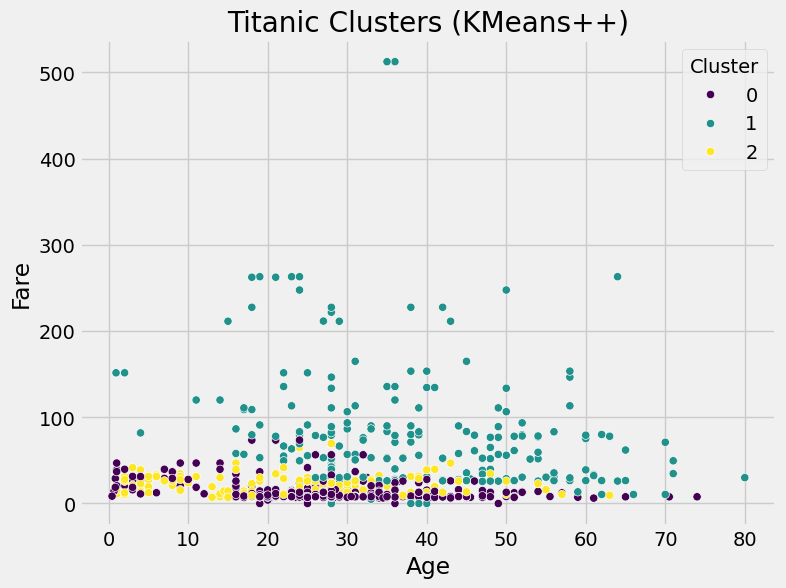

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['Age'], y=features['Fare'], hue=cluster_labels, palette='viridis')
plt.title('Titanic Clusters (KMeans++)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Train & Test Dataset Combined

In [ ]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"

In [ ]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [ ]:
train_df['Source'] = 'Train'
test_df['Source'] = 'Test'

In [ ]:
combined = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
features = combined[['Age', 'Fare', 'Pclass', 'Sex']].copy()

In [ ]:
features['Age'].fillna(features['Age'].median(), inplace=True)
features['Fare'].fillna(features['Fare'].median(), inplace=True)

<ipython-input-43-dbb42e530867>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['Age'].fillna(features['Age'].median(), inplace=True)
<ipython-input-43-dbb42e530867>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [ ]:
combined['Cluster'] = clusters

train_clustered = combined[combined['Source'] == 'Train']
test_clustered = combined[combined['Source'] == 'Test']

print(train_clustered[['PassengerId', 'Name', 'Cluster']].head())

   PassengerId                                               Name  Cluster
0            1                            Braund, Mr. Owen Harris        0
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...        1
2            3                             Heikkinen, Miss. Laina        2
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)        1
4            5                           Allen, Mr. William Henry        0


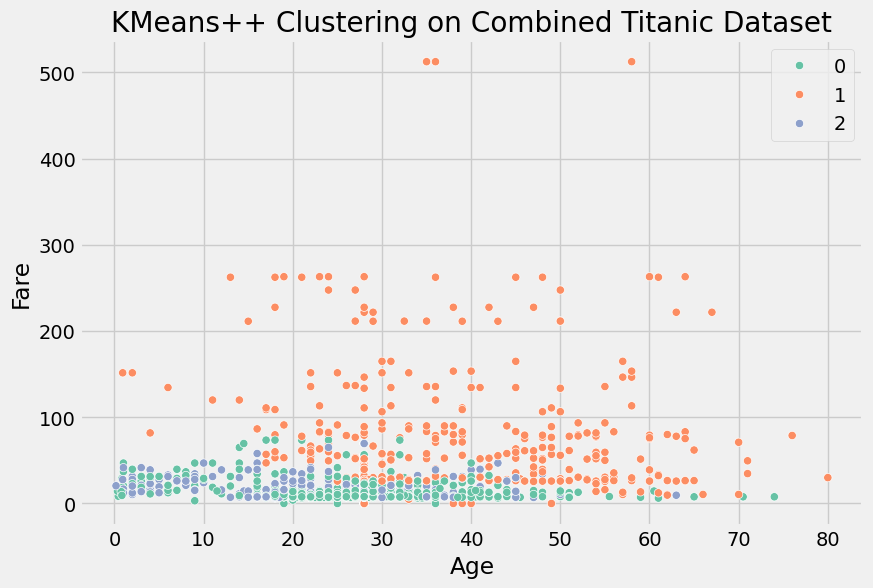

In [ ]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=features['Age'], y=features['Fare'], hue=clusters, palette='Set2')
plt.title("KMeans++ Clustering on Combined Titanic Dataset")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()